In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.head()

,train.way,test.way,train.shot,test.shot,train.query,test.query,train.episodes,test.episodes,background,silence,unknown,epochs,lr,wd,train.acc,val.acc,timestamp
0,2,2,1,1,5,15,200,100,False,False,False,200,0.001,0.0,0.8065,0.765333,2019-10-28 18:36:06
1,2,2,5,5,5,15,200,100,True,False,False,200,0.001,0.0,0.9135,0.835333,2019-10-28 18:36:15
2,4,4,10,10,5,15,200,100,False,False,True,200,0.001,0.0,0.9282,0.773333,2019-10-28 19:27:53
3,4,4,10,10,5,15,200,100,True,True,False,200,0.001,0.0,0.8682,0.639467,2019-10-28 19:28:21
4,4,4,10,10,5,15,200,100,True,False,True,200,0.001,0.0,0.9080,0.709733,2019-10-28 19:28:59


In [4]:
ways = sorted(df['train.way'].unique())
print(ways)

[2, 3, 4, 5]


In [5]:
shots = sorted(df['train.shot'].unique())
print(shots)

[1, 5, 10, 15, 20]


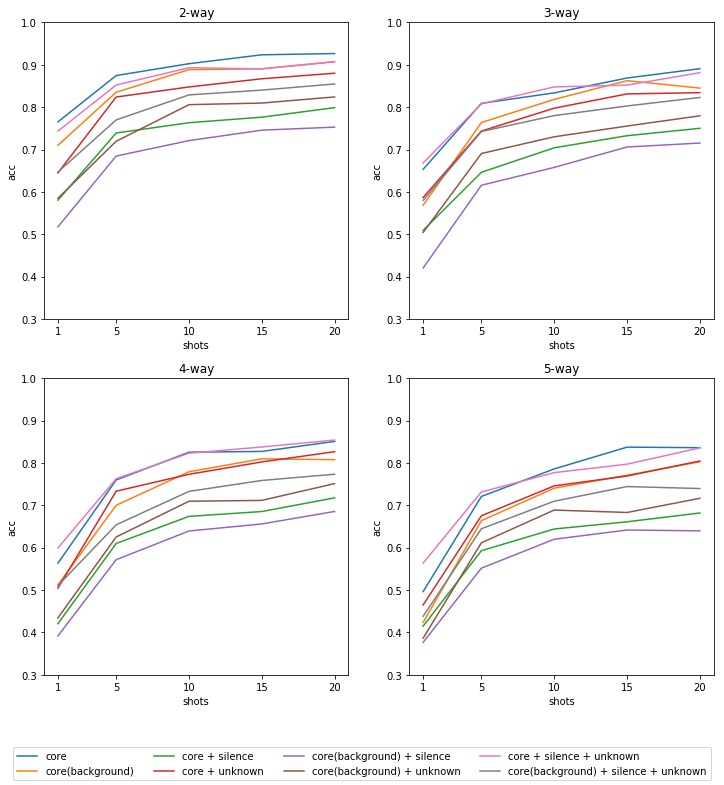

In [6]:
fig = plt.figure(figsize=(12, 12))
    
for j, way in enumerate(ways):
    ax = fig.add_subplot(2,2,j+1)
    
    df1 = df[df['train.way'] == way] 
    
    for i in range(8):

        include_background = False
        include_silence = False
        include_unknown = False
        label = 'core'

        if i == 1:
            include_background = True
            label = 'core(background)'
        elif i == 2:
            include_silence = True
            label = 'core + silence'
        elif i == 3:
            include_unknown = True
            label = 'core + unknown'
        elif i == 4:
            include_background = True
            include_silence = True
            label = 'core(background) + silence'
        elif i == 5:
            include_background = True
            include_unknown = True
            label = 'core(background) + unknown'
        elif i == 6:
            include_unknown = True
            include_silence = True
            label = 'core + silence + unknown'
        elif i == 7:
            include_background = True
            include_unknown = True
            include_silence = True
            label = 'core(background) + silence + unknown'

        df2 = df1[(df1['background'] == include_background) & 
                 (df1['silence'] == include_silence) & 
                 (df1['unknown'] == include_unknown)][['train.shot','val.acc']]

        acc = df2.sort_values('train.shot')['val.acc'].values
        ax.plot(shots, acc, label=label)
        
    ax.set_title('{}-way'.format(way))
    ax.set_ylabel('acc')
    ax.set_xlabel('shots')
    ax.set_xticks(shots)
    ax.set_yticks(np.linspace(0.3,1.0,8))

handles, labels = ax.get_legend_handles_labels()
_ = fig.legend(handles, labels, loc='lower center', ncol=4)